## DS School의 데이터분석

## 데이터 로딩하기



--- 
### 데이터셋 설명

* surveys

    DS School 홈페이지에 접속하게 되면 설문조사를 수행하게 되고, 이 결과를 바탕으로 적절한 강의를 선정해 과목 추천을 해드리고 있습니다. 이 때, 수집한 설문조사 내용은 고객의 수요를 조사하는데 아주 소중한 자산이 되고, 강의 내용에 대한 피드백이나 향후 오픈할 강의의 우선순위를 정하는데 쓰일 수 있습니다.
    
    
 * users
 
    여러가지 마케팅 채널들을 통해서 유입된 고객들에게는 별도의 id가 부여가 됩니다. 이를 통해 고객의 결제 유무 등을 파악할 수 있고, 이는 마케팅 채널별 효율 분석에 소중한 자산이 됩니다. mixpanel에서 사용하는 id와 DS School에서 자체적으로 사용하는 데이터베이스의 user id를 연결시켜주는 역할을 하고, 고객에 개인정보를 가지고 있습니다. 이는 비식별화 과정을 거쳐 제공됩니다.
    
    
* payments

    유저들의 결제 정보입니다. 연락처와 수강신청한 기수, 결제일, 결제 상태 등이 제공되는데 마찬가지로 개인정보는 비식별화되어있는 상태로 제공됩니다. 2018년 이전의 결제 정보가 포함되어 있습니다.
    

* 믹스패널 데이터

    DS School은 웹로그 데이터 분석을 위해 믹스패널을 사용합니다. 2009년 설립된 믹스패널은 사용자 추적을 기본으로 하는 분석 툴로, 원하는 서비스 사용자를 지정하면 해당 유저의 활동을 모두 조회할 수 있는 기능을 제공해줍니다. 이를 통해 해당 사용자 그룹의 특성과 사용 패턴을 알 수 있습니다. 유명 액셀러레이터 ‘Y Combinator’의 멤버로 트위치, 우버, 핏빗, 스포티파이, 세일즈포스 등의 고객사를 보유하고 있으며 2016년 1월 기준 누적 투자액 800억원을 기록함과 동시에 기업 가치 9,000억원대로 평가 받는 분석툴이기도 합니다. 실시간분석이 가능하며 코호트 분석과 잔존율, 퍼널 분석이 가능합니다. 믹스패널 데이터 또한 고객의 유입경로 등의 정보를 가지고 있습니다. 제공되는 데이터는 믹스패널 데이터베이스에서 추출한 자료이기 때문에 csv파일로 제공됩니다.

**1. 데이터베이스에서 설문조사 결과를 읽어오겠습니다. 그 다음 사용자와 질문을 기준으로 정렬하겠습니다.**

In [1]:
#데이터를 불러오는데 필요한 판다스와 sqlite3를 import 해주세요.
import pandas as pd
import sqlite3

In [2]:
# 판다스는 테이블을 출력할 때, row나 column이 일정 개수 이상 넘으면 생략해서 보여줍니다.
# column을 생략하길 원하지 않는 경우 아래와 같이 옵션을 주어 생략되지 않도록 할 수 있습니다.
pd.options.display.max_columns = 60

In [3]:
# data폴더의 dsschool.db에 접속을 해주세요.
connect = sqlite3.connect('data/dsschool.db')
connect

In [4]:
# 'surveys' 테이블의 모든 컬럼을 가져오는 쿼리를 작성 후 read_sql로 불러와주세요.
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


In [5]:
# surveys를 user_id와 question_id, 그리고 created_at를 기준으로 정렬하겠습니다.

surveys = surveys.sort_values(by = ['user_id', 'question_id', 'created_at'])

print(surveys.shape)
surveys.head()

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639


---

**2. Survey 정보를 cleaning하겠습니다.**

In [6]:
# answer 값이 't', 'f'로 입력되어 있는데 이를 True, False로 변환하겠습니다.

for i in range(1, 13):
    old_column = f'answer{i}_selected'
    new_column = f'answer{i}_selected(bool)'
    surveys[new_column] = surveys[old_column] == 't'
    
print(surveys.shape)

surveys.head()

(136063, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [7]:
# created_at과 updated_at을 datetime 자료형으로 변환하겠습니다.

surveys['created_at'] = pd.to_datetime(surveys['created_at'])
surveys['updated_at'] = pd.to_datetime(surveys['updated_at'])

surveys.dtypes

survey_id                          object
user_id                            object
question_id                         int64
answer1_selected                   object
answer2_selected                   object
answer3_selected                   object
answer4_selected                   object
answer5_selected                   object
answer6_selected                   object
answer7_selected                   object
answer8_selected                   object
answer9_selected                   object
answer10_selected                  object
answer11_selected                  object
answer12_selected                  object
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
answer1_selected(bool)               bool
answer2_selected(bool)               bool
answer3_selected(bool)               bool
answer4_selected(bool)               bool
answer5_selected(bool)               bool
answer6_selected(bool)               bool
answer7_selected(bool)            

In [8]:
# 같은 유저가 여러번 설문조사를 응답한 경우를 제거하겠습니다.

surveys = surveys.drop_duplicates(['user_id', 'question_id'], keep = 'last')

print(surveys.shape)

surveys.head()

(93481, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.192710,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


**3. 데이터베이스에서 결제정보를 불러오겠습니다. 그리고 연락처와 수업정보를 정리하겠습니다.**

In [9]:
query = "select * from 'payments'"

payments = pd.read_sql(query, connect)

print(payments.shape)

payments.head()

(937, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


In [10]:
# 전화번호 형식을 '000-000-0000'으로 통일시키겠습니다.

import re  # 정규표현식을 활용하여 문자열을 처리하기 위해 re 라이브러리를 불러옵니다.
import numpy as np

# 연락처 컬럼의 데이터가 010 혹은 +82로 시작하는지 여부를 파악하여 연락처 형식을 통일시키는 함수를 만들겠습니다.

def phone_number_cleaning(number):
    if pd.isnull(number):  # 데이터가 비워져 있으면 NaN 리턴
        return np.nan
    
    if '-' in number:     # 데이터에 '-' 가 있으면 그대로 연락처 리턴
        return number

    if '-' not in number:  # 데이터에 '-' 가 없는 경우
        
        # 데이터가 010 으로 시작하면 아래와 같은 형식으로 변환하여 리턴
        if re.search('^010', number):
            number = number[0:3] + '-' + number[3:7] + '-' + number[7:]
            return number
        
        # 데이터가 +82로 시작하면 아래와 같은 형식으로 변환하여 리턴
        else:
            number = number[0:3] + '-' + number[3:5] + '-' + number[5:9] + '-' + number[9:]
            return number
    else: # 010 혹은 +82 를 제외한 문자나 숫자이면 NaN 리턴
        return np.nan
    
payments['연락처(cleaning)'] = payments['연락처'].apply(phone_number_cleaning)

payments[['연락처','연락처(cleaning)']].head(30)

,연락처,연락처(cleaning)
0,01056007186,010-5600-7186
1,01050015510,010-5001-5510
2,01044158112,010-4415-8112
3,01065775220,010-6577-5220
4,010-6433-3577,010-6433-3577
5,010-4538-7018,010-4538-7018
6,010-7270-3256,010-7270-3256
7,010-3681-2427,010-3681-2427
8,010-8713-5162,010-8713-5162
9,010-2175-0067,010-2175-0067


In [11]:
# 대시(-)가 있으면 그대로 반환, 없으면 대시를 넣어주는 함수를 만들어 주세요. 그리고 apply를 이용해 이를 적용해주세요.
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan

#대시가 문자열에 이미 있다면 번호를 그대로 반환합니다.
    if "-" in phone_number:
        return phone_number
    
#대시가 문자열에 없다면 자릿수에 맞추어 대시를 넣어줍니다.
    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number

#연락처 데이터에 clean_phone_number 함수를 각각 apply를 이용해 적용시킵니다.
#그리고 이 데이터들로 연락처(clean) 칼럼을 대체합니다.

#Write your code here!

payments['연락처(clean)'] = payments['연락처'].apply(clean_phone_number)

# 위에서 정규표현식을 활용한 함수와 동일한 결과입니다. 다만, 위에서는 +82로 시작하는 번호도 동일한 형태로 만들어주는 작업을 했으므로
# 그 부분에서는 현재 함수(clean_phone_number)와 다른 결과가 출력되었습니다.
# 이후 연락처 관련 분석에서는 +82 까지 처리한 '연락처(cleaning)' 컬럼을 사용하겠습니다.

payments[['연락처', '연락처(clean)','연락처(cleaning)']].head(30)

,연락처,연락처(clean),연락처(cleaning)
0,01056007186,010-5600-7186,010-5600-7186
1,01050015510,010-5001-5510,010-5001-5510
2,01044158112,010-4415-8112,010-4415-8112
3,01065775220,010-6577-5220,010-6577-5220
4,010-6433-3577,010-6433-3577,010-6433-3577
5,010-4538-7018,010-4538-7018,010-4538-7018
6,010-7270-3256,010-7270-3256,010-7270-3256
7,010-3681-2427,010-3681-2427,010-3681-2427
8,010-8713-5162,010-8713-5162,010-8713-5162
9,010-2175-0067,010-2175-0067,010-2175-0067


In [12]:
# string.split() 사용 예시입니다. 구분 기준마다 문자를 나누어 리스트로 만들어주겠습니다.
print('010-1234-5678'.split('-'))

#별도로 구분 기준을 정해주지 않는 경우 자동으로 공백을 기준으로 분리하겠습니다.
print('입문 속성반 5기'.split())

['010', '1234', '5678']
['입문', '속성반', '5기']


In [13]:
#뒤의 2개를 붙이고 싶은 경우 붙이는 ''.join()을 이용하겠습니다.
example_list = ['입문', '속성반', '5기']

print(''.join(example_list[1:]))

print('--'.join(example_list[1:]))

속성반5기
속성반--5기


In [14]:
# 신청수업을 수업타입과 기수로 분리하는 함수를 만들었습니다. 

def class_type(class_type):
    return class_type.split()[0]

def number(class_type):
    return class_type.split()[1]

In [15]:
# 함수를 적용하여 수업타입과 기수 컬럼을 생성했습니다.
payments['수업타입'] = payments['신청수업'].apply(class_type)
payments['기수'] = payments['신청수업'].apply(number)

payments[['신청수업', '수업타입', '기수']].head()

,신청수업,수업타입,기수
0,입문반 22기,입문반,22기
1,중급반 5기,중급반,5기
2,입문반 22기,입문반,22기
3,입문반 22기,입문반,22기
4,중급반 5기,중급반,5기


**4. 2018년 이후 결제 정보를 정리하겠습니다.**

In [16]:
# 신청날짜 컬럼을 datetime 형태로 변환했습니다.
payments['신청날짜'] = pd.to_datetime(payments['신청날짜'])

payments.dtypes

payment_id               object
이름                       object
이메일                      object
연락처                      object
신청날짜             datetime64[ns]
신청수업                     object
금액                       object
결제방법                     object
상태                       object
연락처(cleaning)            object
연락처(clean)               object
수업타입                     object
기수                       object
dtype: object

In [17]:
# '상태(bool)' 컬럼을 만들기 위한 함수를 작성했습니다.

def pay_bool(pay):
    if pay == '결제 완료':
        return True
    else:
        return False

In [18]:
# pay_bool 함수를 적용해 '상태(bool)' 컬럼을 생성했습니다.

payments['상태(bool)'] = payments['상태'].apply(pay_bool)

payments[['상태', '상태(bool)']].head()

,상태,상태(bool)
0,결제 완료,True
1,결제 완료,True
2,결제 완료,True
3,결제 완료,True
4,결제 완료,True


---

**5. 결제 데이터에서 신청날짜 칼럼을 이용하여 월, 일, 요일, 시간 칼럼을 추가하겠습니다. 그리고, 금액 정보를 정수형 (int)로 바꾸겠습니다.**

In [19]:
payments['신청날짜(연)'] = payments['신청날짜'].dt.year
payments['신청날짜(월)'] = payments['신청날짜'].dt.month
payments['신청날짜(일)'] = payments['신청날짜'].dt.day
payments['신청날짜(시)'] = payments['신청날짜'].dt.hour
payments['신청날짜(분)'] = payments['신청날짜'].dt.minute
payments['신청날짜(초)'] = payments['신청날짜'].dt.second
payments['신청날짜(요일)'] = payments['신청날짜'].dt.day_name()

In [20]:
# 함수를 만들어 '금액(int)' 컬럼을 생성했습니다. 

def int_money(money):
    money = money.replace(',','')
    return int(money)

payments['금액(int)'] = payments['금액'].apply(int_money)

payments[['신청날짜(연)', '신청날짜(월)', '신청날짜(일)', '신청날짜(시)', '신청날짜(분)',
          '신청날짜(초)', '신청날짜(요일)', '금액', '금액(int)']].head()

,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액,금액(int)
0,2018,1,31,15,42,20,Wednesday,"495,000",495000
1,2018,1,31,15,29,24,Wednesday,"594,000",594000
2,2018,1,31,14,4,14,Wednesday,"495,000",495000
3,2018,1,31,10,18,19,Wednesday,"495,000",495000
4,2018,1,30,19,12,54,Tuesday,"594,000",594000


---

**6. 결제 데이터를 바탕으로 요일별, 시간별 결제량의 차이를 구하겠습니다.**

In [21]:
# 요일별
index_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_money = pd.pivot_table(data = payments, index = '신청날짜(요일)', values = '금액(int)', aggfunc = ['sum', 'count'])

weekday_money.loc[index_order]

,sum,count
,금액(int),금액(int)
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


평일의 결제량이 주말에 비해 매우 높은 것을 알 수 있습니다.

In [22]:
# 시간별

pd.pivot_table(data = payments, index = '신청날짜(시)', values = '금액(int)', aggfunc = ['sum', 'count'])

,sum,count
,금액(int),금액(int)
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11


DS School 수강생들의 대부분이 직장인임을 감안할 때, 일별, 시간별 결제금액을 보고 '직장인들이 주로 근무시간에 결제를 결심한다.' 라는 합리적인 가설을 세울 수 있습니다. 이 가설은 점심시간대인 12시부터 1시 사이에 급격하게 감소하는 것을 통해 더 지지받을 수 있습니다.

---

**7. 사용자의 니즈를 바탕으로 향후 오픈할 강의의 우선순위를 정하려고 합니다. 설문조사 데이터에서 답변을 정리하겠습니다.**

In [23]:
#리스트 안에 for 문을 넣을 수 있습니다.
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

In [24]:
# 피벗테이블을 만들기 전에 question 컬럼을 1과 3으로만 구성하여 변수에 저장했습니다.

surveys_1to3 = surveys.loc[(surveys['question_id'] == 1) | (surveys['question_id'] == 3)]

print(surveys_1to3.shape)

surveys_1to3.head()

(26735, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
72904,l9fuqg4gd1ps,00alzmkik2is,1,f,f,f,f,t,None,None,None,None,None,None,None,2018-03-17 03:00:05.393106,2018-03-17 03:00:05.393106,False,False,False,False,True,False,False,False,False,False,False,False
72924,19xsjb2wf446,00alzmkik2is,3,f,f,f,f,f,f,f,f,f,f,f,t,2018-03-17 03:00:36.675699,2018-03-17 03:00:36.675699,False,False,False,False,False,False,False,False,False,False,False,True
91539,kwr0kkz8u7oq,00d6ng2vgzo0,1,f,f,t,f,f,None,None,None,None,None,None,None,2018-05-29 11:47:49.585360,2018-05-29 11:47:49.585360,False,False,True,False,False,False,False,False,False,False,False,False


In [25]:
# question_id 가 1 과 3인 경우만 피벗 테이블로 출력하겠습니다.

answer_table = pd.pivot_table(data = surveys_1to3, index = 'question_id', values = answer_list, fill_value = 0)

answer_table[answer_list]

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079,0.173421,0.356281,0.12368


1번 질문에는 1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해) 가 가장 높은 답변을 받았고, 3번 질문에서는 8번 응답 (마케팅 데이터를 분석하여 마케팅의 효율을 높이고 싶다.)가 가장 높은 응답을 받았습니다.

---

**8. 결제 데이터와 유저 데이터에는 동일한 id (payment_id), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 두 데이터를 합치겠습니다.**

In [26]:
# users 테이블을 불러오겠습니다.

query = "select * from 'users'"

users = pd.read_sql(query, connect)

print(users.shape)

users.head()

(48030, 4)


,user_id,mixpanel_id,payment_id,email
0,2q0ucs4kiiko,DLDEBFOWFZMCIWXRWZZLGULCHTPPYZTDPSTFMZCQUPNNZS...,None,c4l74sjvhybg@dsschool.co.kr
1,n5yxumr8w20w,TCCZWHROYZCUABWOHIXIYDSLKYPQHLUGVYYLTDAQETOEEF...,None,wgkwoep07x26@dsschool.co.kr
2,tjzjbj2awswz,BBRFELKWMCNGYXSFZKPCUXXAAVJZHMDHRZKZKXSDIRDIFS...,None,64elpdsxe0wz@dsschool.co.kr
3,xvt93f37om9q,TKBAYLPGJKWLUGKZQVBJEKKMIZULJIAVUUFBXMZIEPGXGB...,None,hgvkoilokgfq@dsschool.co.kr
4,smsnz99ugq3q,PAAVHVFEYHJZUWNYRDVEXWXXLLVVAWNJDIRSQTQYGXQLAK...,None,5ztx2nzuitjg@dsschool.co.kr


In [27]:
# payments와 users를 merge하겠습니다. (옵션 : left_on = '이메일', right_on = 'email', how = 'inner')

pay_user = pd.merge(payments, users, left_on = '이메일', right_on = 'email')

print(pay_user.shape)

pay_user.head()

(2911, 26)


,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(cleaning),연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,email
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,2ireif5hcmum,LXLZTHNKXXRGCGUDWJQBFOBVLAMAVDERJIHBYSKOJURJEE...,None,0usbs4knns0s@dsschool.co.kr
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,rxscxv1ym6q3,GSICVJAYOOXJFQUYDWYTLPTXFPAIPWOLOJHJILYFSDUFRZ...,None,0usbs4knns0s@dsschool.co.kr
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr
3,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,5pi3y5b5vyyz,QRLCZJOGNMMUBATPWCBTTBPCHKMFZCZQTFMTIIMDUGALCR...,None,0usbs4knns0s@dsschool.co.kr
4,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,010-5001-5510,중급반,5기,True,2018,1,31,15,29,24,Wednesday,594000,c2qg2tlmmx5h,VGYKVUDURCXYRZCZUYMPCBZEVJGJOJOELMLVKKLGYLEDQF...,None,ysf7krr1j67o@dsschool.co.kr


In [28]:
# pay_user와 surveys를 merge하겠습니다. (옵션 : on = 'user_id', how = 'inner')

pay_user_survey = pd.merge(pay_user, surveys, on = 'user_id')

print(pay_user_survey.shape)

pay_user_survey.head()

(3035, 54)


,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(cleaning),연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,email,survey_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,nnvz4nsy03ob,1,f,t,f,f,f,None,None,None,None,None,None,None,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156,False,True,False,False,False,False,False,False,False,False,False,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,ihb40hmj9393,2,f,f,f,t,None,None,None,None,None,None,None,None,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754,False,False,False,True,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,p9p9ygppdbel,3,f,f,f,t,t,f,f,f,f,f,t,f,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897,False,False,False,True,True,False,False,False,False,False,True,False
3,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,ogkdb8929apq,4,f,f,t,None,None,None,None,None,None,None,None,None,2018-01-31 06:15:52.621368,2018-01-31 06:15:52.621368,False,False,True,False,False,False,False,False,False,False,False,False
4,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,xmxwzpcut4cb,5,f,t,f,f,None,None,None,None,None,None,None,None,2018-01-31 06:16:00.043586,2018-01-31 06:16:00.043586,False,True,False,False,False,False,False,False,False,False,False,False


---

**9. 결제 데이터와 유저 데이터에는 동일한 id (e-mail), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 각자 가져와서 SQL join으로 합치겠습니다.**

In [29]:
query = '''
    select 'payments'.payment_id, 'payments'.이름, 'payments'.이메일, 'payments'.연락처, 'payments'.신청날짜, 'payments'.신청수업,
    'payments'.금액, 'payments'.결제방법, 'payments'.상태, 'users'.*, 'surveys'.*
    from 'payments'
    inner join 'users' on 'payments'.이메일 = 'users'.email
    inner join 'surveys' on 'users'.user_id = 'surveys'.user_id
'''

query_pay_user_survey = pd.read_sql(query, connect)

print(query_pay_user_survey.shape)

query_pay_user_survey.head(3)

(3884, 30)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,user_id,mixpanel_id,payment_id,email,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,5vtq11wow61w,한서훈,3xy4zzr6k13x@dsschool.co.kr,01040513577,2018-01-03 14:44:12,입문반 19기,"495,000",카드결제,결제 완료,orqcrchp0s2a,OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...,None,3xy4zzr6k13x@dsschool.co.kr,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,209h7wqy7bdf,김재호,ao6kez00wxnh@dsschool.co.kr,010-6880-0251,2017-10-22 08:53:29,입문반 11기,"495,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
2,uh701zm4irgx,김재호,ao6kez00wxnh@dsschool.co.kr,010-7202-2433,2017-12-21 16:47:00,딥러닝 2기,"1,043,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152


---

**10. 8번에서 merging한 데이터 중 필요한 컬럼만 추리고 데이터를 클리닝하겠습니다.**

In [30]:
# 분석에 필요한 컬럼들의 리스트입니다.
# '연락처(clean)' 대신 +82 번호까지 cleaning 한 '연락처(cleaning)' 컬럼을 사용하겠습니다.

selected_columns = ['user_id',  '이름', '연락처(cleaning)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]

#위의 리스트를 이용하여 데이터에 필요한 컬럼만 남겨주세요.

#Write your code here!

pay_user_survey = pay_user_survey[selected_columns]

print(pay_user_survey.shape)

pay_user_survey.head()

(3035, 25)


,user_id,이름,연락처(cleaning),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
0,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,1,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156
1,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,2,False,False,False,True,False,False,False,False,False,False,False,False,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754
2,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,3,False,False,False,True,True,False,False,False,False,False,True,False,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897
3,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,4,False,False,True,False,False,False,False,False,False,False,False,False,2018-01-31 06:15:52.621368,2018-01-31 06:15:52.621368
4,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,5,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-31 06:16:00.043586,2018-01-31 06:16:00.043586


In [31]:
# '이메일', 'question_id', 'created_at' 컬럼을 기준으로 정렬하겠습니다.

pay_user_survey = pay_user_survey.sort_values(by = ['이메일', 'question_id', 'created_at'])

print(pay_user_survey.shape)

pay_user_survey.head()

(3035, 25)


,user_id,이름,연락처(cleaning),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526
888,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555
891,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220


In [32]:
# 신청날짜 이후 설문응답(created_at)이 있는 경우를 제외하겠습니다.

response_after_pay = pay_user_survey[pay_user_survey['신청날짜'] >= pay_user_survey['created_at']]

response_after_pay.head()

,user_id,이름,연락처(cleaning),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526
888,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555
891,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220


In [33]:
# '이메일', '신청수업', 'question_id' 컬럼을 기준으로 최신 정보만 남기고 삭제하겠습니다.

response_after_pay = response_after_pay.drop_duplicates(['이메일', '신청수업', 'question_id'], keep = 'last')

print(response_after_pay.shape)

response_after_pay.head()

(1092, 25)


,user_id,이름,연락처(cleaning),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526
888,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555
891,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220


---

**11. 위에서 정리한 결과를 바탕으로 결제를 한 사람들의 설문조사 1,3번 응답결과를 정리하겠습니다.**

In [34]:
# question_id 가 1 과 3인 경우만 피벗 테이블로 출력하겠습니다.

response_after_pay_1to3 = response_after_pay.loc[(response_after_pay['question_id'] == 1) | (response_after_pay['question_id'] == 3)]

table_response_after_pay = pd.pivot_table(data = response_after_pay_1to3, index = 'question_id', values = answer_list)

table_response_after_pay[answer_list]

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.314103,0.115385,0.262821,0.076923,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.474359,0.391026,0.269231,0.429487,0.294872,0.262821,0.217949,0.410256,0.121795,0.211538,0.391026,0.147436


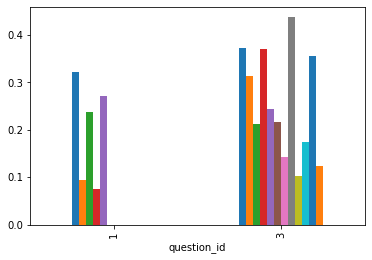

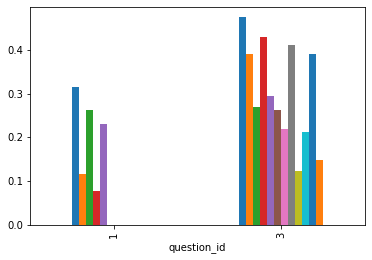

In [35]:
# 그래프를 주피터 화면에 띄우기 위한 주피터 명령어입니다.
%matplotlib inline

# 모든 사람의 설문조사 결과
answer_table = answer_table[answer_list] # 그래프로 출력하니 설문조사 문항 순서가 깨져 다시 순서를 지정했습니다.
answer_table.plot.bar(legend = False, grid = False)

# 결제완료한 사람의 설문조사 결과
table_response_after_pay = table_response_after_pay[answer_list] # 설문조사 문항 순서 재설정
table_response_after_pay.plot.bar(legend = False, grid = False)

모든 설문조사 결과와 결제한 사람들의 설문조사 결과는 상당히 비슷한 양상을 보입니다. 그런데, 1번 질문의 5번 응답 '최신 데이터사이언스 트렌드에 관심이 있어서' 응답을 한 경우는 결제율이 낮다는 것을 알 수 있습니다. 

아무래도 고가의 강의이다 보니, 관심만 있는 정도로는 구매로의 전환이 쉽게 일어나지 않습니다.
1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해)의 비율이 압도적으로 높고, 두 번째는 전업 데이터 사이언티스트로 이직/전직하기 입니다. 

모든 사람을 대상 설문조사 결과와 결제자 대상 설문조사 결과를 3번 질문에서도 비교해 봤을 때, 응답 8번 또한 눈에 띄게 줄어든 것을 확인할 수 있습니다. 8번의 응답은 '마케팅 데이터를 분석하여 마케팅의 효율을 높이기' 입니다. 이를 바탕으로 마케팅에 관심이 있는 사람들은 데이터 마케팅 강의로 이탈하거나 사이언스 강의를 수강하지 않는다고 생각할 수 있습니다.

---

**12. created_at은 세션이 생성된 시간이고 '신청날짜'는 실제로 수업을 신청한 시간입니다. DS School 홈페이지에 처음 접근한 순간부터 결제까지 걸린 시간을 계산해주세요. 단, 신청날짜가 created_at보다 작은(먼저인) 경우가 있는데 이를 제외하고 구하겠습니다.**

In [36]:
# 신청날짜가 설문응답 시간보다 빠른 경우를 제외하겠습니다.

pay_before_response = pay_user_survey[pay_user_survey['신청날짜'] > pay_user_survey['created_at']]

pay_before_response.shape

(1666, 25)

In [37]:
response_after_pay[['이름','신청날짜' , 'created_at']].head(20)

,이름,신청날짜,created_at
887,강성우,2018-01-17 15:45:55,2018-01-17 06:31:38.247526
888,강성우,2018-01-17 15:45:55,2018-01-17 06:31:42.281112
889,강성우,2018-01-17 15:45:55,2018-01-17 06:31:55.697999
890,강성우,2018-01-17 15:45:55,2018-01-17 06:31:59.842555
891,강성우,2018-01-17 15:45:55,2018-01-17 06:32:03.640220
892,강성우,2018-01-17 15:45:55,2018-01-17 06:32:08.857982
893,강성우,2018-01-17 15:45:55,2018-01-17 06:32:12.210202
2160,홍서은,2018-01-02 15:33:13,2018-01-02 06:30:45.618688
2161,홍서은,2018-01-02 15:33:13,2018-01-02 06:30:47.832017
2162,홍서은,2018-01-02 15:33:13,2018-01-02 06:30:50.373531


In [38]:
# 신청날짜 - created_at 을 하여 time이라는 컬럼을 만들겠습니다.

pay_before_response['time'] = pay_before_response['신청날짜'] - pay_before_response['created_at']

# response_after_pay[['이름','신청날짜' , 'created_at', 'time']].head(20)
pay_before_response[['time']].head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,time
887,09:14:16.752474
888,09:14:12.718888
889,09:13:59.302001
890,09:13:55.157445
891,09:13:51.359780


예를 들어 09:14:16의 경우에는 9시간 14분 16초 걸렸다는 의미입니다. 이를 쉽게 그래프화 하기 위해 .dt를 이용하여 일 단위로 환산해 줍시다.
9시간 14분 16초를 일로 환산한다면 0.384907일 이 됩니다.

In [39]:
# dt.total_seconds() 를 사용하여 일단위로 환산하겠습니다.
# 분 단위 : /60 , 시간 단위 : /(60*60), 일 단위 : /(60*60*24)

pay_before_response['TimeToDay'] = pay_before_response['time'].dt.total_seconds()/(60*60*24)
pay_before_response[['TimeToDay']].head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TimeToDay
887,0.384916
888,0.384869
889,0.384714
890,0.384666
891,0.384622


In [40]:
#그래프를 그리기 위한 library를 불러옵니다.
import seaborn as sns
# import matplotlib.pyplot as plt

In [41]:
# seaborn의 경우 테마설정을 다음과 같이 할 수 있습니다. 사전 구성된 테마는 다음과 같습니다. {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid", {'grid.linestyle': '--'})

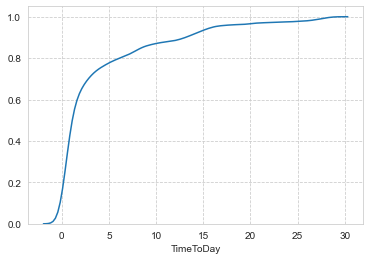

In [42]:
# distplot로 시각화하겠습니다.

sns.distplot(pay_before_response['TimeToDay'], hist = False, kde_kws = {'cumulative' : True})

위의 분포를 통해 결제를 한 사람들 중 80% 이상이 10일 이내 결제, 그리고 나머지 20%는 훨씬 많은 고민을 한다는 것을 파악할 수 있습니다. 

**14. 믹스패널 데이터를 불러와 이를 users와 payments 테이블과 병합하겠습니다.** 

In [43]:
# mix_panel 데이터를 불러왔습니다.
mix_panel = pd.read_csv('data/mixpanel_people_profiles_revised.csv')

print(mix_panel.shape)

mix_panel.head()

(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id
0,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-16T22:00:21,iOS,Facebook Mobile,Seoul,KR,VGGPBLBXCDGZOSCVCODTNZBICKURLVAFKASUMZCNZQHEIU...
1,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-19T19:03:36,iOS,Mobile Safari,Incheon,KR,TIKFTLTMQQLYMKSDPCFCPNSOLHKLOQWQMIMKXBRUPVKEOD...
2,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-21T23:34:02,Windows,Firefox,Seoul,KR,WMFONVUFEIFDJOOZWJHPMTRKPDMKHPDBQSYKYTACHVODOL...
3,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T07:43:58,iOS,Facebook Mobile,Seoul,KR,DYXLHORZUNPSZSEXOIRNGCZWMEHHNKCTACJOFEEWEAFYVX...
4,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T15:03:48,Android,Chrome,Seoul,KR,BRQEHDPQRESBAIAURZIPTHTPDMJZSBBNACVCNMQFGXVXIP...


In [44]:
# mix_panel 과 users 데이터를 merge했습니다. : left_on은 distinct_id, right_on은 mixpanel_id, merge 방법은 inner 입니다.

mix_users = pd.merge(mix_panel, users, left_on = 'distinct_id', right_on = 'mixpanel_id')

print(mix_users.shape)

mix_users.head()

(13875, 24)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr


In [45]:
# mix_users 과 payments 데이터를 merge했습니다. : merge 방법은 left 입니다.

mix_users_payment = pd.merge(mix_users, payments, on = 'payment_id', how = 'left') 

print(mix_users_payment.shape)

mix_users_payment.head()

(13875, 45)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(cleaning),연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr,이초현,g8zyxqrdgcgf@dsschool.co.kr,01088615300,2017-12-17 09:26:56,중급반 4기,"594,000",카드결제,결제 완료,010-8861-5300,010-8861-5300,중급반,4기,True,2017.0,12.0,17.0,9.0,26.0,56.0,Sunday,594000.0
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**14. 위에서 정리한 믹스패널 데이터를 바탕으로 캠페인별 유입 id의 수에 비해 결제 비율이 가장 높은 광고 캠페인을 찾겠습니다.**

In [46]:
mix_users_payment['utm_campaign [first touch]'].value_counts()

$none                              2166
soldout                             643
deeplearningtraffic                 632
problem                             327
ryoovideo                           264
                                   ... 
begreview                             1
absolute                              1
begrowth1                             1
fb2_cheese_audiencetest_w uni_b       1
six_person                            1
Name: utm_campaign [first touch], Length: 113, dtype: int64

In [47]:
# 결측치 그리고 값이 '$none' 인 경우를 제외하여 새로운 변수에 저장했습니다.

notnull_mix_users_payment = mix_users_payment[(pd.notnull(mix_users_payment['utm_campaign [first touch]'])) &
                                (mix_users_payment['utm_campaign [first touch]'] != '$none')]

notnull_mix_users_payment.shape

(4670, 45)

In [48]:
# 평균을 계산하기 위해 bool 타입을 숫자로 변환하겠습니다.
# notnull_mix_users_payment.loc[notnull_mix_users_payment['상태(bool)'] == True, '상태(bool)'] = 1  이렇게 기존컬럼에 덮어씌우면
# 데이터 타입이 object에서 float으로 변환이 되질 않아 '상태(bool)_int' 라는 새로운 컬럼을 생성했습니다.

notnull_mix_users_payment.loc[notnull_mix_users_payment['상태(bool)'] == True, '상태(bool)_int'] = 1
notnull_mix_users_payment.loc[notnull_mix_users_payment['상태(bool)'] != True, '상태(bool)_int'] = 0

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [49]:
# 피벗테이블을 만들겠습니다.
first_touch_table = pd.pivot_table(data = notnull_mix_users_payment, index = 'utm_campaign [first touch]', values = '상태(bool)_int',
                                   aggfunc = 'mean')
    
first_touch_table.sort_values(by = '상태(bool)_int', ascending = False).head(10)

,상태(bool)_int
utm_campaign [first touch],
dsschoolintro,0.333333
kang1,0.066667
dripinsta7,0.066667
5why2,0.055556
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303


head와 tail을 보면 극단적으로 많거나 (33%) 0%인 것을 확인할 수 있습니다. 이는 적은 예산을 쓴 캠페인은 해당 캠페인으로 부터 유입된 고객 자체가 적기 때문에 결과가 극단적으로 나오는 것입니다.

따라서, 유입 고객의 수가 20명 이상인 캠페인에 대해서만 위의 분석을 진행하겠습니다.

In [50]:
# utm_campaign [first touch] 컬럼 데이터들의 각각의 빈도를 구해서 변수에 저장하겠습니다.
campaign_20 = notnull_mix_users_payment['utm_campaign [first touch]'].value_counts()

# 빈도가 20 이상인 경우만을 추출하겠습니다.
campaign_20 = campaign_20[campaign_20 >= 20]

# 피벗테이블 작성에서 사용할 빈도 20이상인 인덱스를 추출하여 변수에 저장하겠습니다.
campaign_20_index = campaign_20.index # 리스트 형태로 저장

# isin 함수는 컬럼이 리스트의 값들을 포함하고 있는 모든 행들을 골라낼 때 주로 쓰이므로 이를 활용하여 
# 빈도 20이상인 데이터를 저장하겠습니다.
campaign_over_20 = notnull_mix_users_payment.loc[notnull_mix_users_payment['utm_campaign [first touch]'].isin(campaign_20_index)]

# 피벗테이블을 작성하겠습니다.
campaign_20_table = pd.pivot_table(data = campaign_over_20, index = 'utm_campaign [first touch]', values = '상태(bool)_int', 
                                   aggfunc = 'mean')

campaign_20_table.sort_values(by = '상태(bool)_int', ascending = False).head(10)

,상태(bool)_int
utm_campaign [first touch],
dripinsta7,0.066667
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303
univmajor,0.028037
sungwon,0.026316
Clab,0.024390


상위권의 캠페인들은 유입된 고객대비 결제율이 다른 캠페인에 비해 상당히 높은 것을 파악할 수 있습니다.

---

**15. 결제 데이터를 바탕으로 두 개 이상의 강의를 수강한 고객들을 찾겠습니다.**

In [51]:
# 구매 강좌수를 구하기에 앞서 결제 완료인 데이터로 필터링하겠습니다.

completed_pay = payments.loc[payments['상태'] == '결제 완료']

print(completed_pay.shape)

completed_pay.head()

(810, 22)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(cleaning),연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,010-5001-5510,중급반,5기,True,2018,1,31,15,29,24,Wednesday,594000
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112,010-4415-8112,입문반,22기,True,2018,1,31,14,4,14,Wednesday,495000
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220,010-6577-5220,입문반,22기,True,2018,1,31,10,18,19,Wednesday,495000
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577,010-6433-3577,중급반,5기,True,2018,1,30,19,12,54,Tuesday,594000


In [52]:
# 결제 완료인 데이터를 기준으로 이메일 컬럼의 각 이메일 빈도 수를 정리하겠습니다 (value_counts() 사용).
# 정리된 데이터를 데이터 프레임으로 만들고 기존의 '이메일'이라는 이름을 '구매 강좌수' 로 변환하겠습니다.

class_count = completed_pay['이메일'].value_counts()

# 이메일 빈도 수가 2 이상인 데이터로 정리하겠습니다.
over_two_class = class_count[class_count >= 2]

df_class_count = pd.DataFrame(over_two_class)

df_class_count.columns = ['구매 강좌수']

df_class_count.head()

,구매 강좌수
1n04ko1pgq3r@dsschool.co.kr,4
zq1ccpk8bjj3@dsschool.co.kr,3
ewgzngg51eyr@dsschool.co.kr,3
18vwfdfclejc@dsschool.co.kr,3
9y78t05klfhw@dsschool.co.kr,3
